In [1]:
import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import researchpy as rp
from scipy.stats import levene


plt.rcParams["figure.figsize"] = (10,8) 

# Pair Programming Asunciones Regresión Lineal

    En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


    El objetivo de este pair programming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:
        1. Normalidad (ya la deberíais haber evaluado)


Nuestra variable respuesta no cumple esta condición. Vamos a ir evaluando el resto de asunciones a la espera de saber si podremos normalizarla. 

In [3]:
df= pd.read_csv("../datos/supermarket_limpio.csv", index_col=0)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Rating,hora_compra,mes_compra
Invoice ID,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,9.1,Mañana,January
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6,Mañana,March
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4,Mañana,March
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,8.4,Noche,January
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,5.3,Mañana,February


        2.  Homogeneidad de varianzas


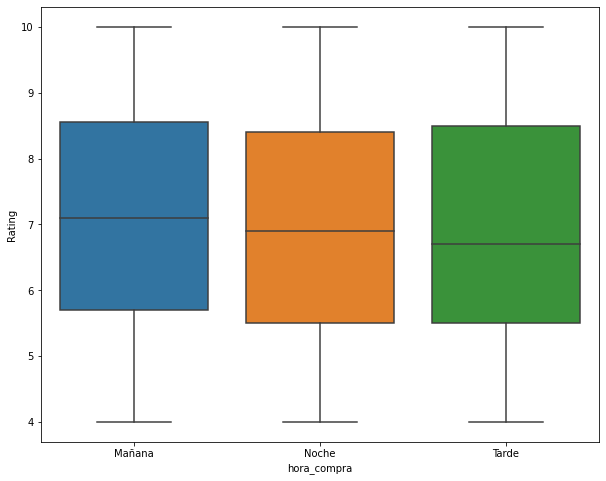

In [9]:
sns.boxplot(x=df["hora_compra"], y = df["Rating"], data = df);

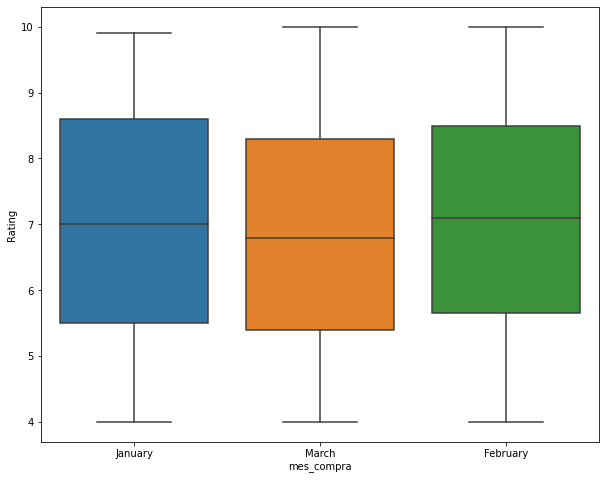

In [10]:
sns.boxplot(x=df["mes_compra"], y = df["Rating"], data = df);

In [17]:
df["mes_compra"].value_counts()

January     352
March       345
February    303
Name: mes_compra, dtype: int64

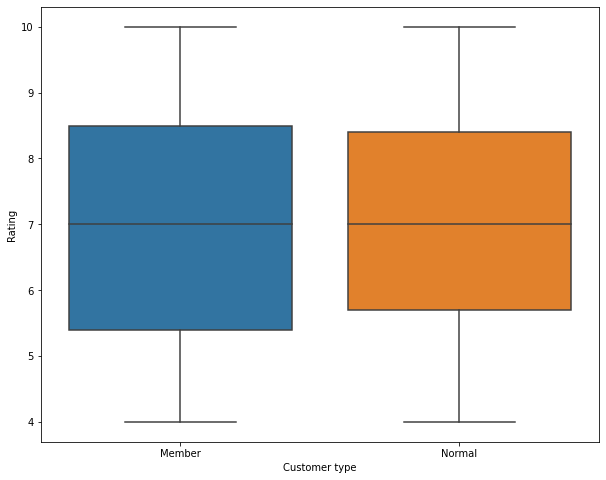

In [11]:
sns.boxplot(x=df["Customer type"], y = df["Rating"], data = df);

In [18]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

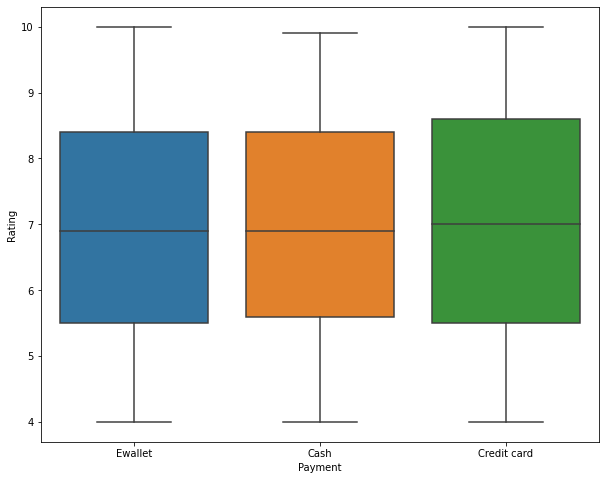

In [12]:
sns.boxplot(x=df["Payment"], y = df["Rating"], data = df);


In [19]:
df["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

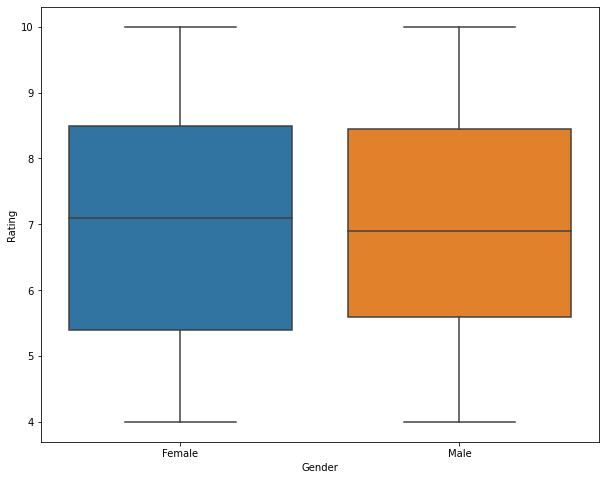

In [15]:
sns.boxplot(x=df["Gender"], y = df["Rating"], data = df);

In [20]:
df["Gender"].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

Vemos que nuestras variables categóricas predictoras son homocedásticas. En este caso se ve visualmente bien. 

In [43]:
# creamos un diccionario para almacenar los resultados de los test
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de precio
numericas_col = df.select_dtypes(include = np.number).drop("Rating", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.Rating, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

In [44]:
resultados

{'Unit price': 0.0,
 'Quantity': 5.057396158167268e-72,
 'Tax 5%': 8.64465835428562e-176,
 'Total': 8.248082173683168e-231}

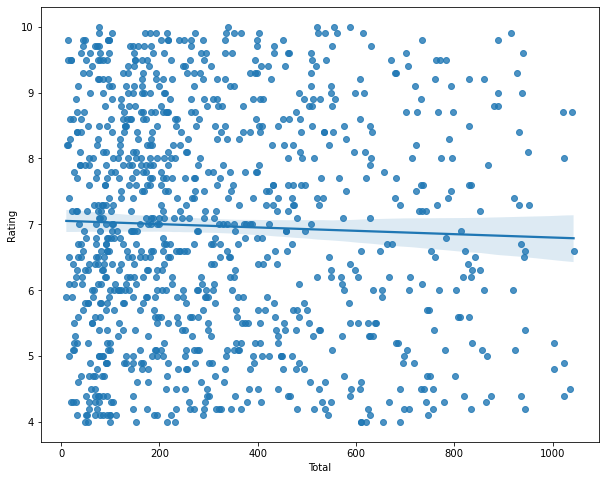

In [13]:
sns.regplot(data = df, x=df["Total"], y = df["Rating"]);

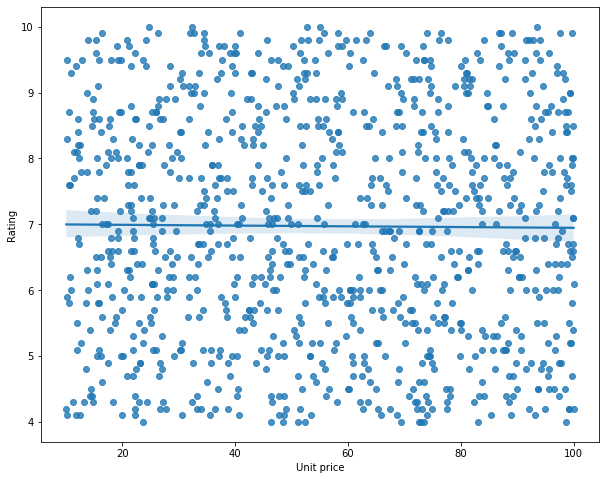

In [14]:

sns.regplot(data = df, x=df["Unit price"], y = df["Rating"]);

Siguiendo lo que habíamos visto ya, en el caso de las variables numéricas la asunción de homocedasticidad no se cumple, por lo tanto no podremos utilizarlas en el modelo de regresión lineal si finalmente fuera posible aplicarlo. 

        3. Independencia de las variables
    Cada asunción la deberéis testar de forma visual y analítica.

In [26]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Rating,hora_compra,mes_compra
Invoice ID,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,9.1,Mañana,January
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6,Mañana,March
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4,Mañana,March
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,8.4,Noche,January
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,5.3,Mañana,February


Variables a comprobar: Gender, Payment, hora_compra, mes_compra, Customer_type
                       

In [21]:
crosstab, test_results, expected = rp.crosstab(df["Gender"], df["Payment"], 
                                    test = "chi-square", expected_freqs = True, 
                                    prop = "cell")

In [23]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,2.9497
1,p-value =,0.2288
2,Cramer's V =,0.0543


Estas dos variables son independientes. 

In [27]:
crosstab2, test_results2, expected2 = rp.crosstab(df["Gender"], df["hora_compra"], 
                                    test = "chi-square", expected_freqs = True, 
                                    prop = "cell")

In [28]:
test_results2

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,9.8463
1,p-value =,0.0073
2,Cramer's V =,0.0992


In [29]:
crosstab3, test_results3, expected3 = rp.crosstab(df["Gender"], df["mes_compra"], 
                                    test = "chi-square", expected_freqs = True, 
                                    prop = "cell")

In [30]:
test_results3

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,3.5921
1,p-value =,0.1660
2,Cramer's V =,0.0599


In [34]:

r1 = rp.crosstab(df["Gender"], df["Customer type"], test = "chi-square")
r1

(              Customer type             
 Customer type        Member Normal   All
 Gender                                  
 Female                  261    240   501
 Male                    240    259   499
 All                     501    499  1000,
                 Chi-square test  results
 0  Pearson Chi-square ( 1.0) =    1.5997
 1                    p-value =    0.2059
 2               Cramer's phi =    0.0400)

In [35]:
rp.crosstab(df["hora_compra"], df["Customer type"], test = "chi-square")


(              Customer type             
 Customer type        Member Normal   All
 hora_compra                             
 Mañana                  183    200   383
 Noche                   141    140   281
 Tarde                   177    159   336
 All                     501    499  1000,
                 Chi-square test  results
 0  Pearson Chi-square ( 2.0) =    1.7184
 1                    p-value =    0.4235
 2                 Cramer's V =    0.0415)

In [36]:
rp.crosstab(df["hora_compra"], df["mes_compra"], test = "chi-square")

(            mes_compra                    
 mes_compra    February January March   All
 hora_compra                               
 Mañana             117     143   123   383
 Noche               80      95   106   281
 Tarde              106     114   116   336
 All                303     352   345  1000,
                 Chi-square test  results
 0  Pearson Chi-square ( 4.0) =    2.7743
 1                    p-value =    0.5963
 2                 Cramer's V =    0.0372)

In [37]:
rp.crosstab(df["hora_compra"], df["Payment"], test = "chi-square")

(            Payment                          
 Payment        Cash Credit card Ewallet   All
 hora_compra                                  
 Mañana          142         117     124   383
 Noche            88          91     102   281
 Tarde           114         103     119   336
 All             344         311     345  1000,
                 Chi-square test  results
 0  Pearson Chi-square ( 4.0) =    2.6496
 1                    p-value =    0.6181
 2                 Cramer's V =    0.0364)

In [38]:
rp.crosstab(df["mes_compra"], df["Payment"], test = "chi-square")

(           Payment                          
 Payment       Cash Credit card Ewallet   All
 mes_compra                                  
 February       112          90     101   303
 January        122         113     117   352
 March          110         108     127   345
 All            344         311     345  1000,
                 Chi-square test  results
 0  Pearson Chi-square ( 4.0) =    2.3453
 1                    p-value =    0.6725
 2                 Cramer's V =    0.0342)

In [40]:
rp.crosstab(df["mes_compra"], df["Customer type"], test = "chi-square")

(              Customer type             
 Customer type        Member Normal   All
 mes_compra                              
 February                163    140   303
 January                 172    180   352
 March                   166    179   345
 All                     501    499  1000,
                 Chi-square test  results
 0  Pearson Chi-square ( 2.0) =    2.4136
 1                    p-value =    0.2992
 2                 Cramer's V =    0.0491)

In [41]:
rp.crosstab(df["Payment"], df["Customer type"], test = "chi-square")

(              Customer type             
 Customer type        Member Normal   All
 Payment                                 
 Cash                    168    176   344
 Credit card             172    139   311
 Ewallet                 161    184   345
 All                     501    499  1000,
                 Chi-square test  results
 0  Pearson Chi-square ( 2.0) =    5.2170
 1                    p-value =    0.0736
 2                 Cramer's V =    0.0722)

Todas nuestras variable categóricas predictoras son independientes. 